In [43]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load in the data

df = pd.read_csv('Spotify_Christmas_Streams.csv')

In [47]:
# Understanding the data

df.describe()
df.head()

,date,track,artist,streams,day_of_week,week_of_year
0,2017-11-16,All I Want for Christmas Is You,Mariah Carey,3821572,Thursday,46
1,2017-11-23,All I Want for Christmas Is You,Mariah Carey,6130250,Thursday,47
2,2017-11-23,Last Christmas,Wham!,4040197,Thursday,47
3,2017-11-30,All I Want for Christmas Is You,Mariah Carey,11641888,Thursday,48
4,2017-11-30,It's Beginning to Look a Lot Like Christmas,Michael Bublé,4577042,Thursday,48


In [49]:
# How many distinct songs?

df['track'].nunique()

7

In [51]:
# Clean datetimes

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

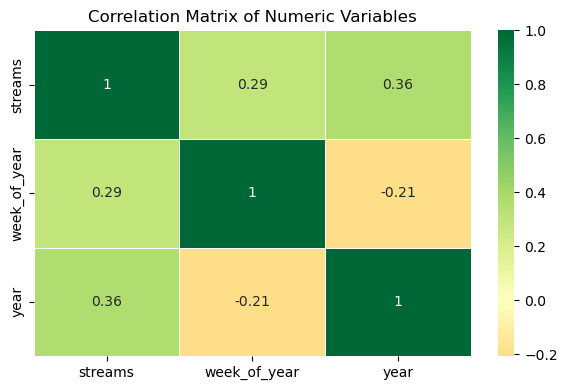

In [53]:
# Analyze correlation

corr_df = df.copy()
corr_df['year'] = corr_df['date'].dt.year
corr_df = corr_df[['streams', 'week_of_year', 'year']]
correlation_matrix = corr_df.corr()
correlation_matrix

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    center=0,
    linewidths=0.5
)

plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.show()

In [55]:
# Look at the top

song_totals = (
    df.groupby(['track', 'artist'])['streams']
      .sum()
      .sort_values(ascending=False)
)

song_totals


track                                        artist        
All I Want for Christmas Is You              Mariah Carey      1772401522
Last Christmas                               Wham!             1504418271
Rockin' Around the Christmas Tree            Brenda Lee        1162883008
Jingle Bell Rock                             Bobby Helms       1028886045
Santa Tell Me                                Ariana Grande     1013488311
It's Beginning to Look a Lot Like Christmas  Michael Bublé      927548499
Feliz Navidad                                José Feliciano     632895127
Name: streams, dtype: int64

In [57]:
# Better understatnd the week variable

df['week_of_year'].describe()

count    376.000000
mean      48.603723
std        5.888283
min        1.000000
25%       48.000000
50%       49.000000
75%       51.000000
max       53.000000
Name: week_of_year, dtype: float64

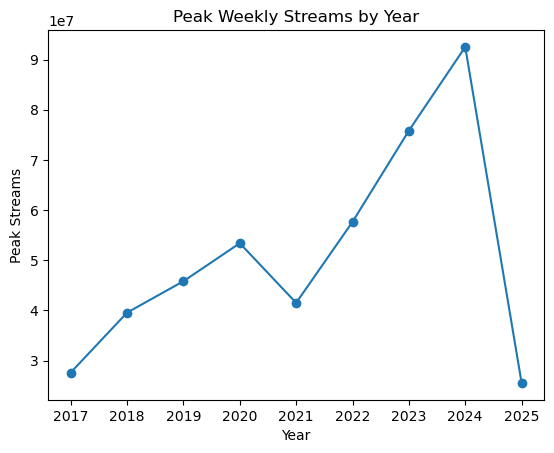

In [59]:
# Identify the peak weekly streams

peak_streams = (
    df.groupby('year')['streams']
           .max()
)

plt.figure()
plt.plot(peak_streams.index, peak_streams.values, marker='o')
plt.title("Peak Weekly Streams by Year")
plt.xlabel("Year")
plt.ylabel("Peak Streams")
plt.show()


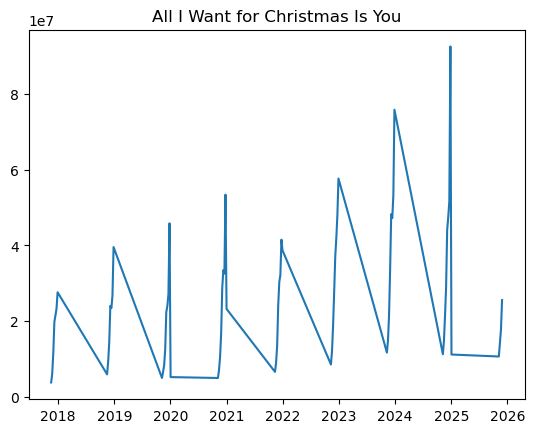

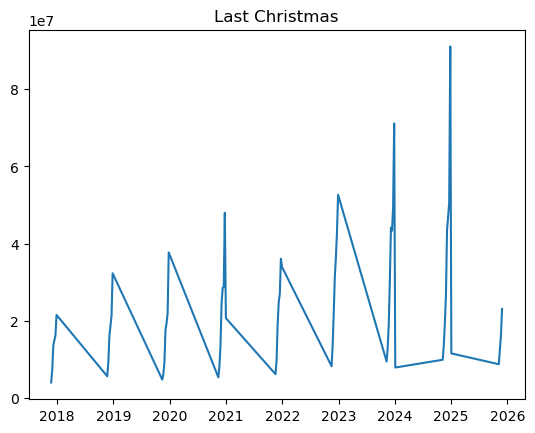

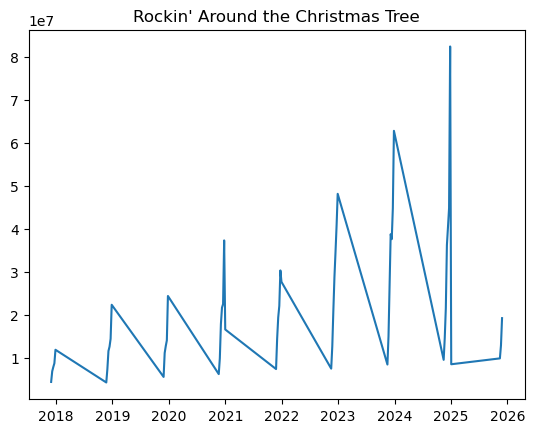

In [61]:
# Overall top tracks

top_tracks = (
    df.groupby('track')['streams']
      .sum()
      .sort_values(ascending=False)
      .head(3)
      .index
)

for t in top_tracks:
    t_df = df[df['track'] == t]
    plt.figure()
    plt.plot(t_df['date'], t_df['streams'])
    plt.title(t)
    plt.show()


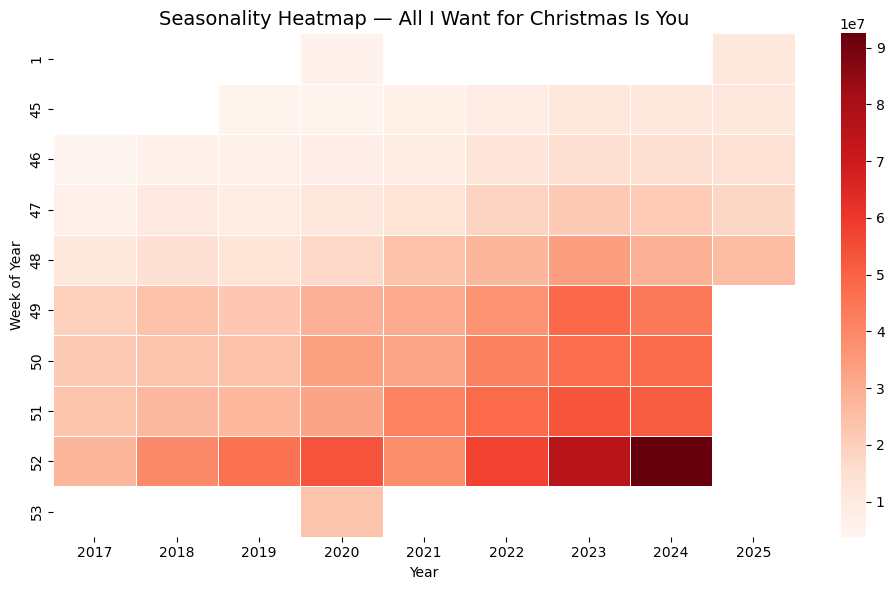

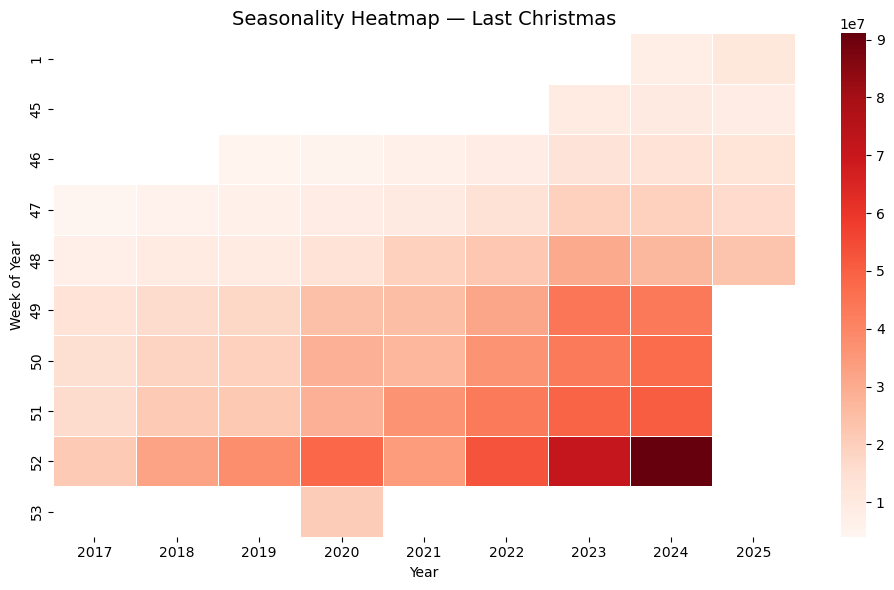

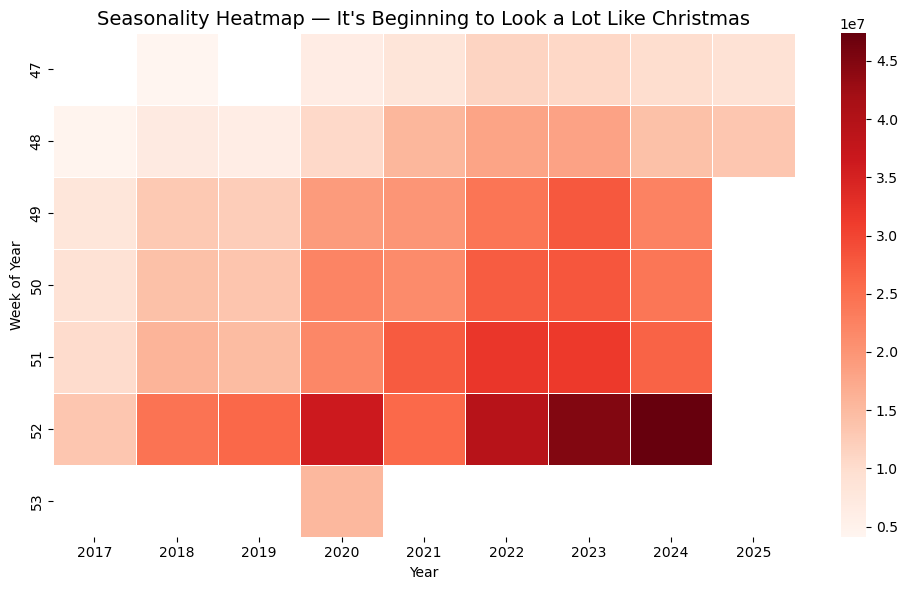

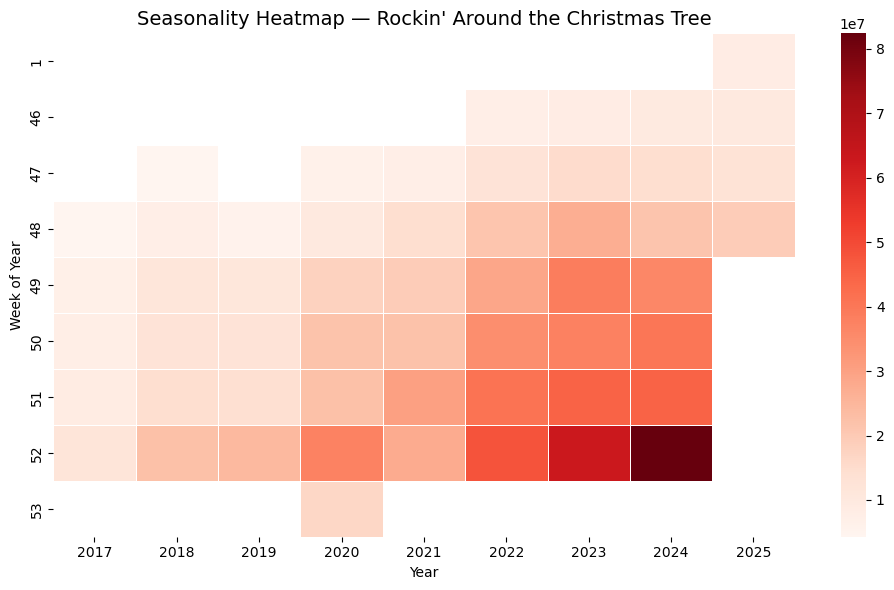

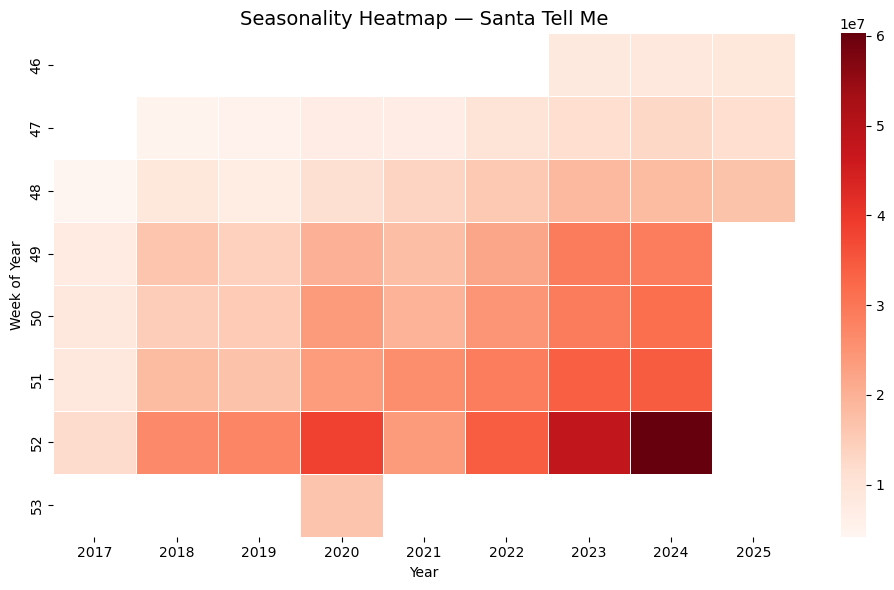

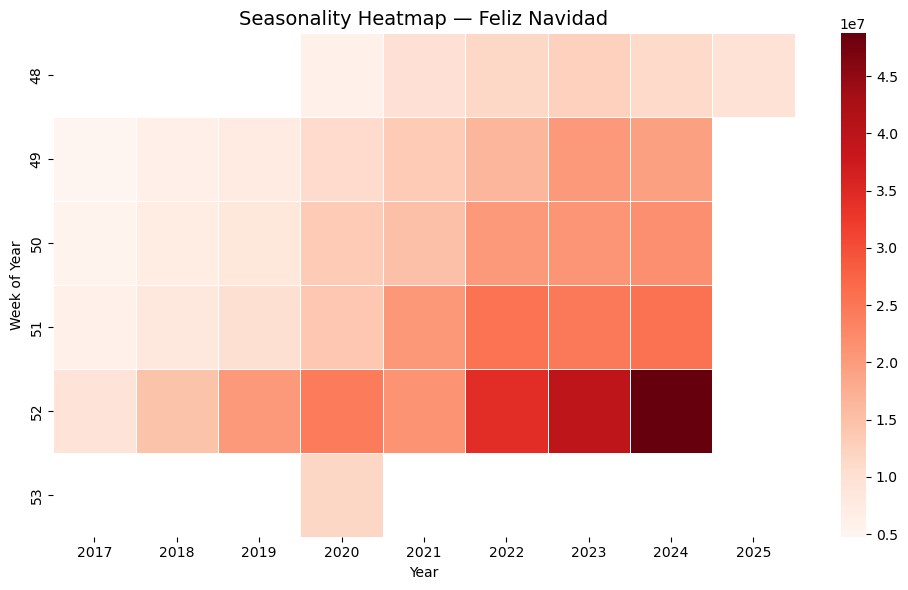

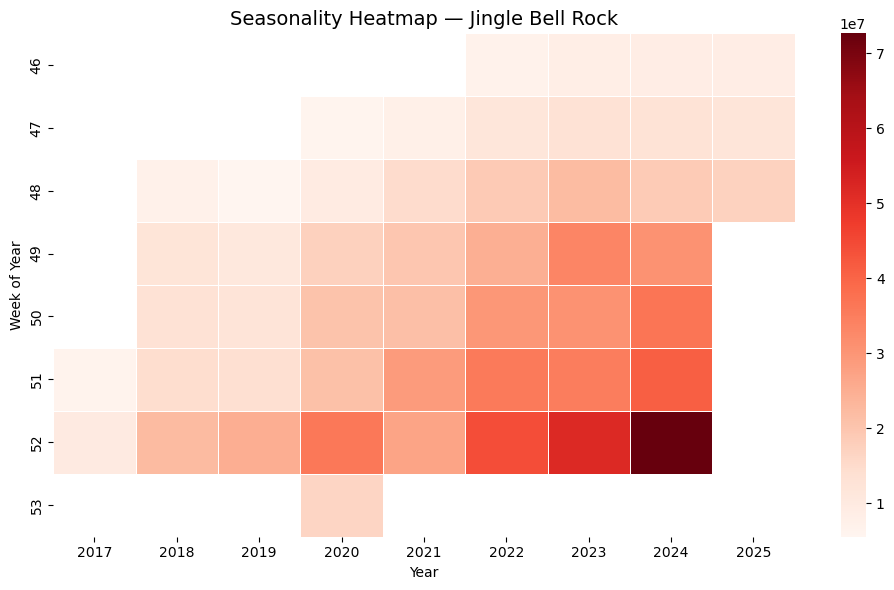

In [62]:
# Heat map of songs by week

tracks = df['track'].unique()

for track in tracks:
    song_df = df[df['track'] == track]

    # Create pivot table
    pivot = song_df.pivot_table(
        index='week_of_year',
        columns='year',
        values='streams',
        aggfunc='sum'
    )

    # Skip songs with insufficient data
    if pivot.shape[1] < 2:
        continue

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot,
        cmap='Reds',
        linewidths=0.5,
        linecolor='white'
    )

    plt.title(f"Seasonality Heatmap — {track}", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Week of Year")

    plt.tight_layout()
    plt.show()



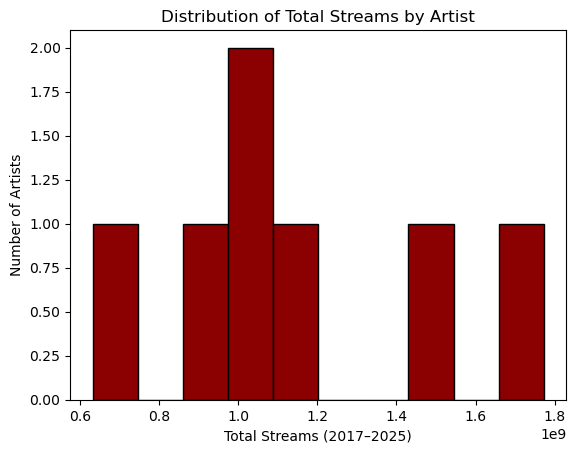

In [67]:
# Streams by artist

artist_streams = (
    df.groupby('artist')['streams']
      .sum()
      .sort_values(ascending=False)
)

plt.figure()
plt.hist(
    artist_streams,
    bins=10,
    color='darkred',
    edgecolor='black'
)

plt.title("Distribution of Total Streams by Artist")
plt.xlabel("Total Streams (2017–2025)")
plt.ylabel("Number of Artists")
plt.show()


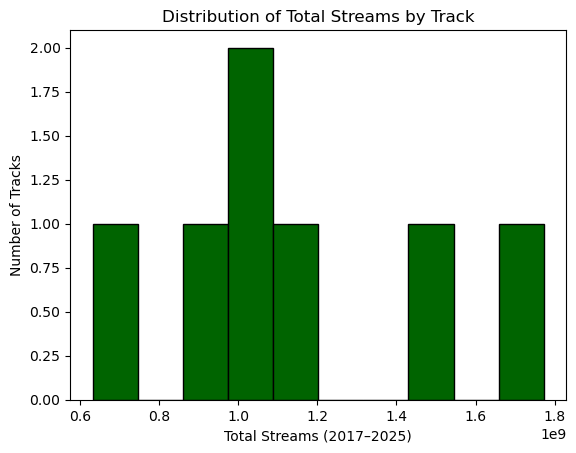

In [69]:
# Streams by track

track_streams = (
    df.groupby('track')['streams']
      .sum()
      .sort_values(ascending=False)
)

plt.figure()
plt.hist(
    track_streams,
    bins=10,
    color='darkgreen',
    edgecolor='black'
)

plt.title("Distribution of Total Streams by Track")
plt.xlabel("Total Streams (2017–2025)")
plt.ylabel("Number of Tracks")
plt.show()


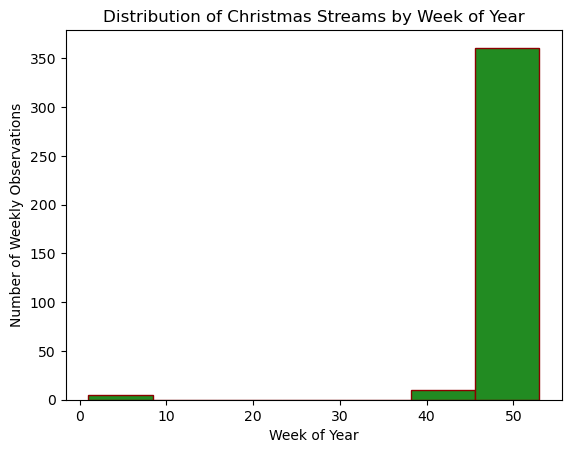

In [71]:
# Weeks data

plt.figure()
plt.hist(
    df['week_of_year'],
    bins=7,
    color='forestgreen',
    edgecolor='darkred'
)

plt.title("Distribution of Christmas Streams by Week of Year")
plt.xlabel("Week of Year")
plt.ylabel("Number of Weekly Observations")
plt.show()
